## Importing Necessary Libraries
---



---



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from tabulate import tabulate

## Importing Necessary Libraries
---



---



In [46]:
data = pd.read_csv("/Users/pranavkhot/Documents/Fetal Health Project/data/processed_data.csv")


## Exploratory Data Analysis (EDA)
---



---



In [47]:
# Calculate skewness for each feature
skewness = data.skew()
skewness = skewness.round(2)
skewness_data = pd.DataFrame(skewness, columns=['Skewness']).reset_index()
skewness_data.index += 1
skewness_data.rename(columns={'index': 'Feature'}, inplace=True)
print("Skewness:")
print(tabulate(skewness_data, headers='keys', tablefmt='fancy_grid'))

Skewness:
╒════╤════════════════════════════════════════════════════════╤════════════╕
│    │ Feature                                                │   Skewness │
╞════╪════════════════════════════════════════════════════════╪════════════╡
│  1 │ baseline value                                         │       0.02 │
├────┼────────────────────────────────────────────────────────┼────────────┤
│  2 │ accelerations                                          │       1.2  │
├────┼────────────────────────────────────────────────────────┼────────────┤
│  3 │ fetal_movement                                         │       7.81 │
├────┼────────────────────────────────────────────────────────┼────────────┤
│  4 │ uterine_contractions                                   │       0.16 │
├────┼────────────────────────────────────────────────────────┼────────────┤
│  5 │ light_decelerations                                    │       1.72 │
├────┼────────────────────────────────────────────────────────┼───

In [48]:
# Calculate kurtosis for each column
kurtosis_values = data.apply(kurtosis)
kurtosis_data = pd.DataFrame(kurtosis_values, columns=['Kurtosis']).reset_index()
kurtosis_data.columns = ['Feature', 'Kurtosis']
kurtosis_data.index += 1
print("Kurtosis Values:")
print(tabulate(kurtosis_data, headers='keys', tablefmt='fancy_grid', showindex=True))

Kurtosis Values:
╒════╤════════════════════════════════════════════════════════╤════════════╕
│    │ Feature                                                │   Kurtosis │
╞════╪════════════════════════════════════════════════════════╪════════════╡
│  1 │ baseline value                                         │  -0.295075 │
├────┼────────────────────────────────────────────────────────┼────────────┤
│  2 │ accelerations                                          │   0.763023 │
├────┼────────────────────────────────────────────────────────┼────────────┤
│  3 │ fetal_movement                                         │  64.107    │
├────┼────────────────────────────────────────────────────────┼────────────┤
│  4 │ uterine_contractions                                   │  -0.6364   │
├────┼────────────────────────────────────────────────────────┼────────────┤
│  5 │ light_decelerations                                    │   2.50872  │
├────┼─────────────────────────────────────────────────────

In [49]:
# Count the number of unique values in each categorical column
categorical_columns = ['fetal_health']
for column in categorical_columns:
    unique_values = data[column].nunique()
    print(f"Number of unique values in {column}: {unique_values}")

Number of unique values in fetal_health: 3


In [50]:
# Calculating the Percentage Distribution of the Target Variable
fetal_health_counts = data['fetal_health'].value_counts()
fetal_health_percentage = fetal_health_counts / fetal_health_counts.sum() * 100
fetal_health_data = pd.DataFrame(fetal_health_percentage).reset_index()
fetal_health_data.columns = ['index', 'percentage']
labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
fetal_health_data['index'] = fetal_health_data['index'].map(labels)
fetal_health_data.columns = ['Fetal Health Class', 'Percentage']
print("Percentage Distribution of the Fetal Health Class:")
print(tabulate(fetal_health_data, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="right"))

Percentage Distribution of the Fetal Health Class:
╒══════════════════════╤══════════════╕
│ Fetal Health Class   │   Percentage │
╞══════════════════════╪══════════════╡
│ Normal               │      77.8457 │
├──────────────────────┼──────────────┤
│ Suspect              │      13.8758 │
├──────────────────────┼──────────────┤
│ Pathological         │      8.27846 │
╘══════════════════════╧══════════════╛


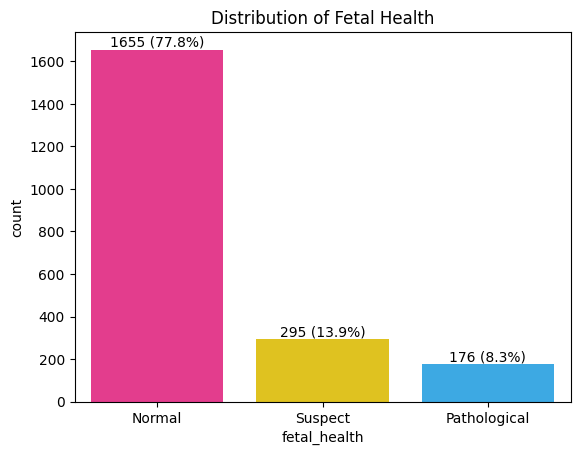

In [51]:
# Mapping of class labels
labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
cust_pallete = sns.color_palette(['#ff218c', '#ffd800', '#21b1ff'])

# Calculate class counts
_, cnts = np.unique(data['fetal_health'], return_counts=True)
bar_labels = [f"{cnt} ({cnt/data.shape[0]*100:.1f}%)" for cnt in cnts]

# Create a count plot
plt.figure()
ax = sns.countplot(x=data['fetal_health'], palette=cust_pallete)
ax.bar_label(ax.containers[0], labels=bar_labels)
ax.set_xticklabels(list(labels.values()))

# Set plot title and display the plot
plt.title("Distribution of Fetal Health")
plt.show()


About 77.8% of observations are having normal fetal health, 13.8% are having suspect fetal health and 8.2% are pathological

When engaging in the development of a machine learning model, it is crucial to consider the class distribution of the training dataset. A disproportionate distribution, often referred to as class imbalance, may lead to biased predictions towards the majority class. This occurs because numerous machine learning algorithms aim to maximize the overall accuracy, which can be readily achieved by predominantly predicting the majority class when class imbalance is present.

However, it's essential to note that in this particular scenario, the dataset has been curated by subject matter experts. It implies a degree of confidence in the inherent structure and class distributions of the dataset, as the experts would have considered these aspects during its compilation. Consequently, it may not be necessary or appropriate to apply Synthetic Minority Over-sampling Technique (SMOTE), a method commonly used to rectify class imbalance by artificially inflating the minority class.

That being said, for the sake of exploration and to satiate intellectual curiosity, one might still wish to observe the potential effects of applying SMOTE on model performance. This exercise could potentially yield interesting insights and might even provide unexpected improvements in the model's ability to generalize or in its predictive performance. Nonetheless, such a technique should be used cautiously, keeping in mind that the original dataset distribution was considered and constructed by experts in the field.





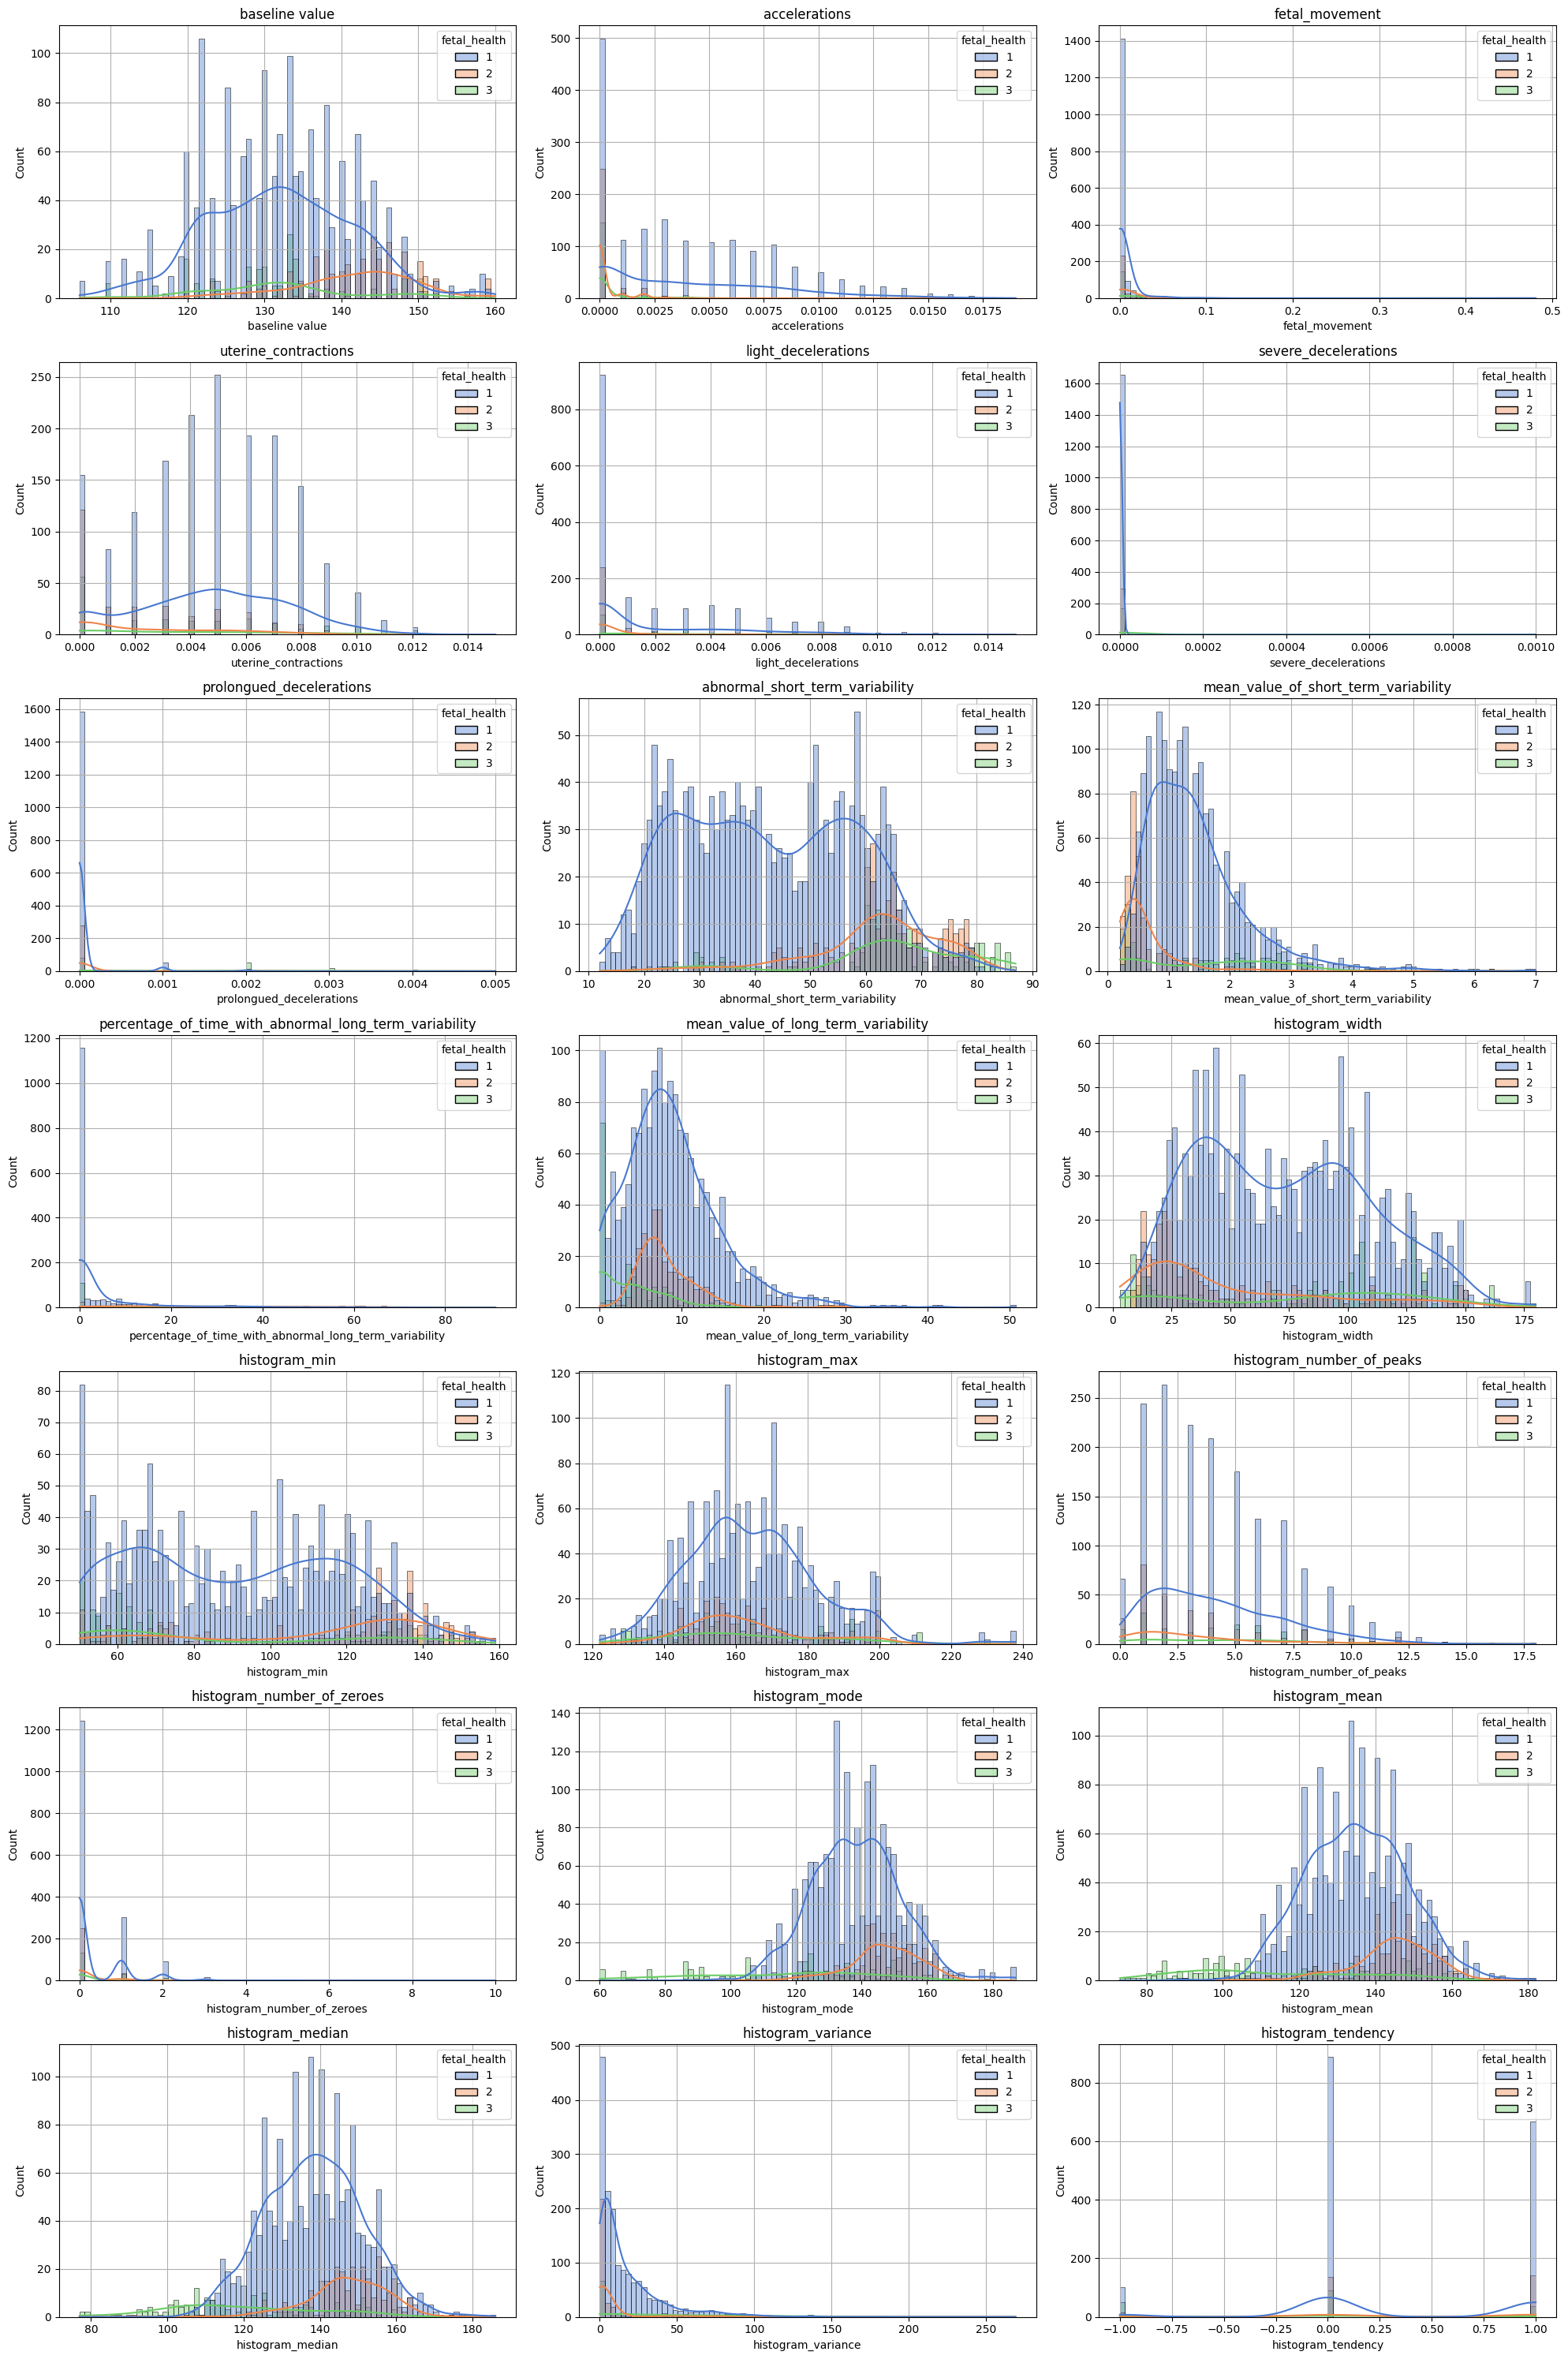

In [52]:
# Set up the figure and axes for the plots
fig, ax = plt.subplots(7, 3, figsize=(20, 30))
ax = ax.ravel()
# Get the feature columns by dropping the target column
df_feature = data.drop(["fetal_health"], axis=1)
# For each feature column, plot a histogram
for i, col in enumerate(df_feature.columns):
    sns.histplot(data, x=col, hue='fetal_health', kde=True, bins=80, ax=ax[i],  palette='muted', alpha=0.4)
    ax[i].set_title(col)
    ax[i].grid()

plt.tight_layout()
plt.show()

Many features such as abnormal_short_term_variability, accelerations, baseline value, fetal_movement, histogram_mean, histogram_mode, and others appear to have a somewhat normal distribution, albeit with different means and variances.

Some features like severe_decelerations, prolongued_decelerations, histogram_number_of_zeroes are heavily skewed towards zero. This indicates that for many instances in the dataset, these features are not present or very low.

The target variable fetal_health shows the class imbalance, with the majority of instances being in the 'Normal' class.



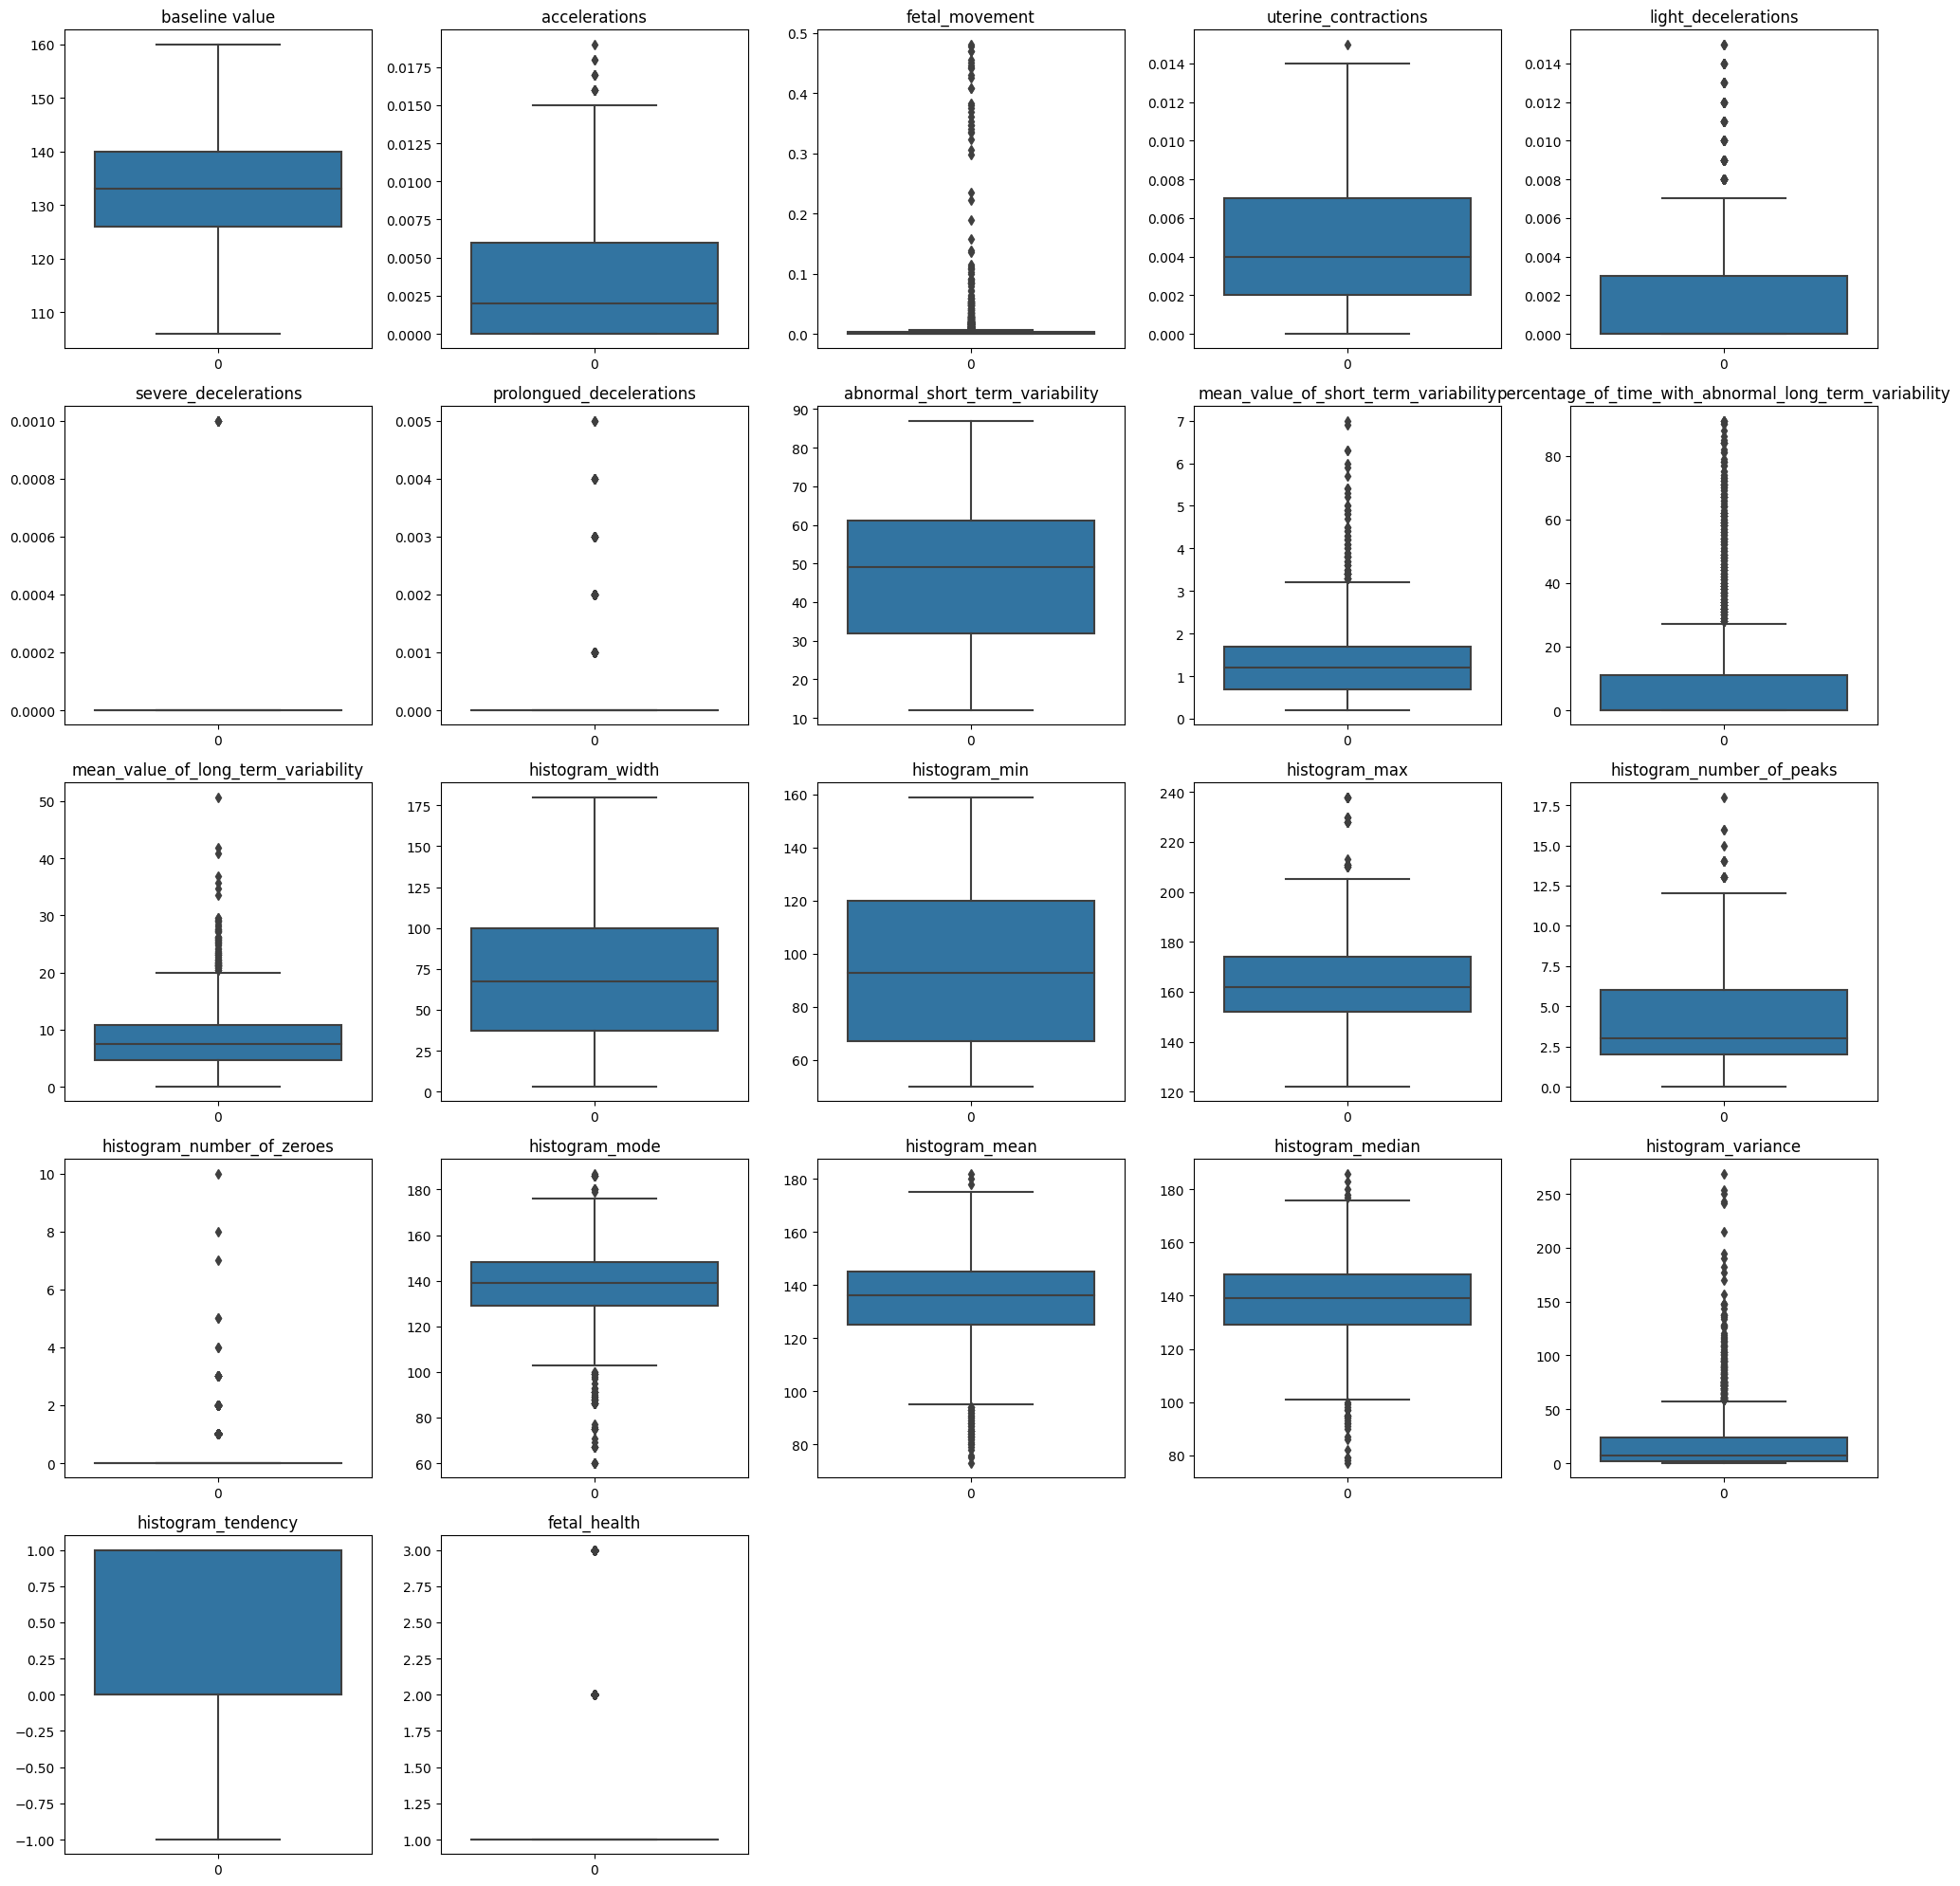

In [53]:
# Plot boxplots for each feature
plt.figure(figsize=(20, 20))
for i, col in enumerate(data.columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

The boxplots above provide a visual representation of the range and distribution of each feature, as well as potential outliers. The line in the middle of each box represents the median of the data, while the box itself represents the interquartile range (from Q1 to Q3). The whiskers usually represent data within 1.5 times the interquartile range. Points outside the whiskers are considered as outliers. Some features like severe_decelerations, prolongued_decelerations, histogram_number_of_zeroes, and others have a lot of data points considered as outliers because these features are heavily skewed towards zero. Features such as accelerations, fetal_movement, uterine_contractions, light_decelerations, and others also have several outliers.

In [54]:
# Calculate the correlation coefficients
correlations = data.corr()['fetal_health']
del correlations['fetal_health']

# Sort the correlations
sorted_correlations = correlations.sort_values(ascending=False)

# Convert series to DataFrame for tabulate
correlations_data = pd.DataFrame(sorted_correlations).reset_index()
correlations_data.columns = ['Feature', 'Correlation with Fetal Health']
correlations_data.index += 1

# Display the correlations in a tabular form
print("Correlation Coefficients with Fetal Health:")
print(tabulate(correlations_data, headers='keys', tablefmt='fancy_grid', showindex=True))

Correlation Coefficients with Fetal Health:
╒════╤════════════════════════════════════════════════════════╤═════════════════════════════════╕
│    │ Feature                                                │   Correlation with Fetal Health │
╞════╪════════════════════════════════════════════════════════╪═════════════════════════════════╡
│  1 │ prolongued_decelerations                               │                       0.484859  │
├────┼────────────────────────────────────────────────────────┼─────────────────────────────────┤
│  2 │ abnormal_short_term_variability                        │                       0.471191  │
├────┼────────────────────────────────────────────────────────┼─────────────────────────────────┤
│  3 │ percentage_of_time_with_abnormal_long_term_variability │                       0.426146  │
├────┼────────────────────────────────────────────────────────┼─────────────────────────────────┤
│  4 │ histogram_variance                                     │           

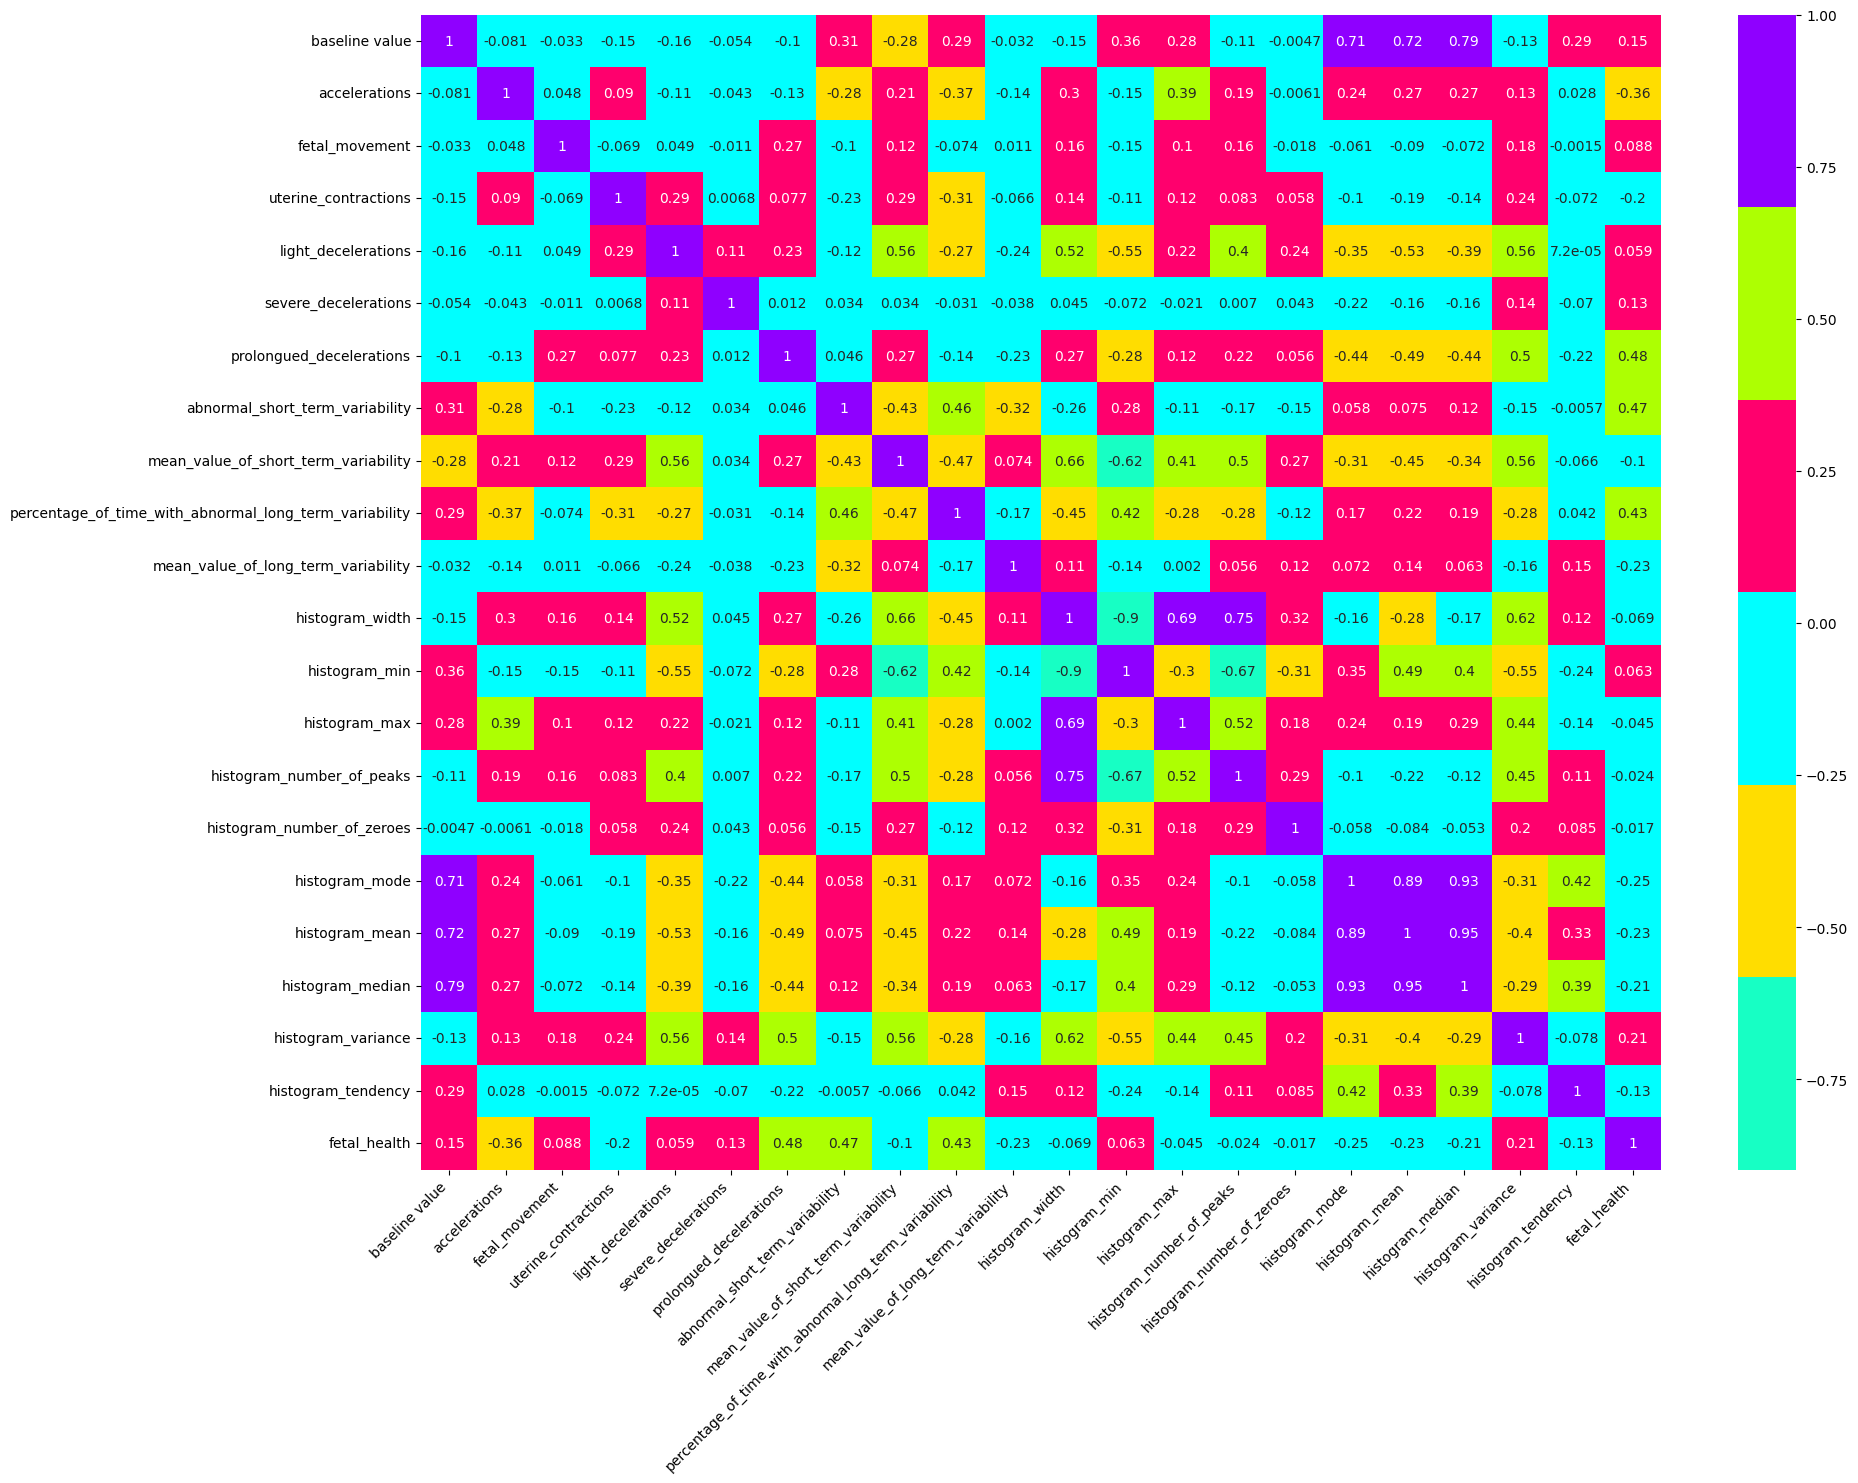

In [55]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = ["#17ffc4", "#ffdd00", "#00ffff", "#ff006d", "#adff02", "#8f00ff"]
corrmat= data.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, cmap=cols, annot=True)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

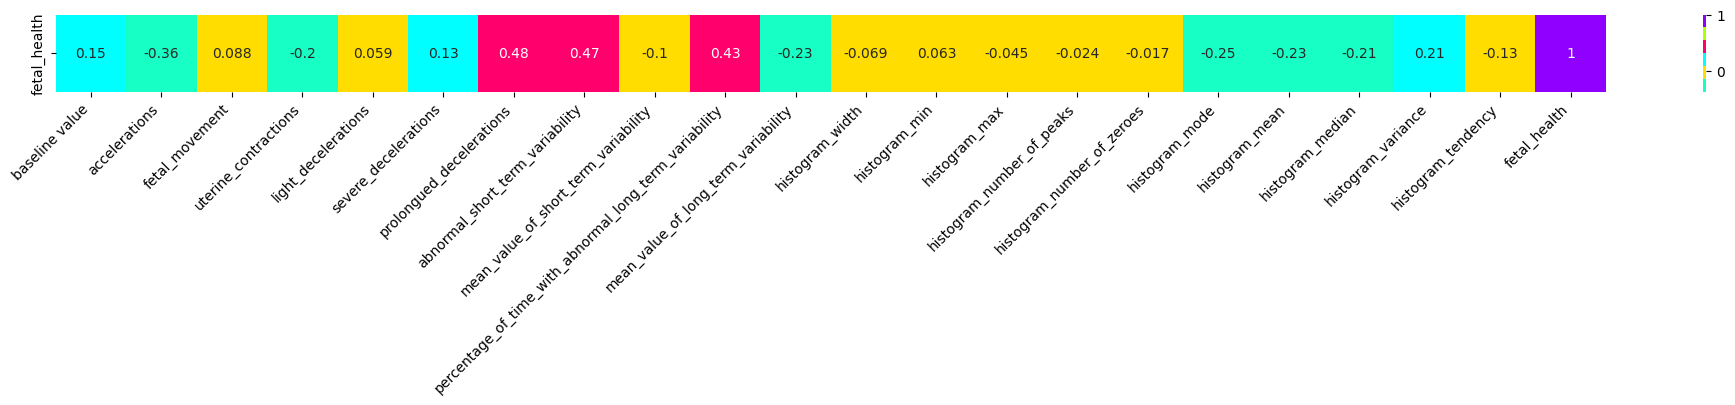

In [56]:
cols = ["#17ffc4", "#ffdd00", "#00ffff", "#ff006d", "#adff02", "#8f00ff"]
# Pearson's correlation matrix
correlation_matrix = data.corr()
plt.subplots(figsize=(25,1))
sns.heatmap(correlation_matrix.sort_values(by=["fetal_health"], ascending=False).head(1),
            annot=True, cmap=sns.color_palette(cols))
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

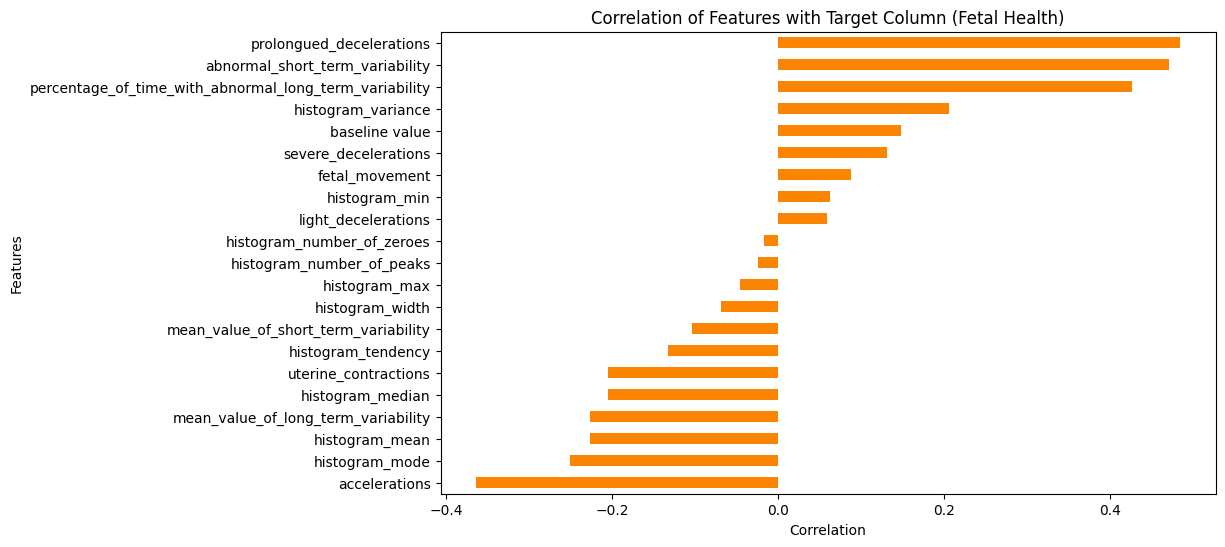

In [57]:
# Correlation with Target Variable
plt.figure(figsize=(10, 6),dpi=100)
data.corr()['fetal_health'].sort_values()[:-1].plot(kind='barh', color='#fb8500')
plt.title('Correlation of Features with Target Column (Fetal Health)')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()